In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point, Polygon

import folium
from folium import Map
from folium.map import Layer, FeatureGroup,LayerControl,Marker
from folium.plugins import MarkerCluster,FeatureGroupSubGroup,Fullscreen, FastMarkerCluster

In [2]:
incidents = pd.read_csv('./geocoded_fire_incidents.csv')

In [3]:
incidents.head()

,action_taken1_desc,action_taken2_desc,action_taken3_desc,aes_presence_desc,arrival_date_time,borough_desc,co_detector_present_desc,detector_presence_desc,fire_box,fire_origin_below_grade_flag,...,standpipe_sys_present_flag,story_fire_origin_count,street_highway,total_incident_duration,units_onscene,zip_code,borough,incident_type_num,lat,lon
0,11 - Extinguishment by fire service personnel,51 - Ventilate,NaN,NaN,2018-06-30T23:58:53.000,2 - Bronx,NaN,NaN,2135.0,NaN,...,NaN,NaN,BROWN PL,1508.0,5.0,10454,Bronx,117,40.806936,-73.920758
1,11 - Extinguishment by fire service personnel,NaN,NaN,NaN,2018-06-30T23:30:01.000,1 - Manhattan,NaN,NaN,470.0,NaN,...,NaN,NaN,E 14 ST,1664.0,6.0,10009,Manhattan,151,40.730498,-73.980579
2,11 - Extinguishment by fire service personnel,NaN,NaN,NaN,2018-06-30T22:17:14.000,4 - Brooklyn,NaN,NaN,1646.0,NaN,...,NaN,NaN,PROSPECT PL,982.0,1.0,11233,Brooklyn,151,40.672573,-73.918211
3,11 - Extinguishment by fire service personnel,51 - Ventilate,64 - Shut down system,NaN,2018-06-30T22:11:36.000,1 - Manhattan,NaN,NaN,1271.0,NaN,...,NaN,NaN,AMSTERDAM AVE,1213.0,5.0,10025,Manhattan,117,40.798765,-73.966942
4,11 - Extinguishment by fire service personnel,52 - Forcible entry,"112 - Stretch 1 3/4"" line, extinguish fire",NaN,2018-06-30T21:27:59.000,2 - Bronx,NaN,NaN,2411.0,NaN,...,NaN,NaN,BRYANT AVE,1010.0,1.0,10474,Bronx,151,40.814251,-73.885474


In [4]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99216 entries, 0 to 99215
Data columns (total 28 columns):
action_taken1_desc              99216 non-null object
action_taken2_desc              47414 non-null object
action_taken3_desc              26315 non-null object
aes_presence_desc               14117 non-null object
arrival_date_time               97993 non-null object
borough_desc                    99216 non-null object
co_detector_present_desc        289 non-null object
detector_presence_desc          14117 non-null object
fire_box                        99213 non-null float64
fire_origin_below_grade_flag    2042 non-null float64
fire_spread_desc                14118 non-null object
floor                           37925 non-null object
highest_level_desc              99086 non-null object
im_incident_key                 99216 non-null int64
incident_date_time              99216 non-null object
incident_type_desc              99216 non-null object
last_unit_cleared_date_time  

In [5]:
incidents['incident_type_desc'].value_counts()

151 - Outside rubbish, trash or waste fire                  29589
200 - Overpressure rupture, explosion, overheat other       14555
111 - Building fire                                         14106
116 - Fuel burner/boiler malfunction, fire confined         10456
118 - Trash or rubbish fire, contained                       9559
100 - Fire, other                                            8473
112 - Fires in structure other than in a building            6706
117 - Commercial Compactor fire, confined to rubbish         2725
150 - Outside rubbish fire, other                            1074
130 - Mobile property (vehicle) fire, other                   418
160 - Special outside fire, other                             282
114 - Chimney or flue fire, confined to chimney or flue       244
115 - Incinerator overload or malfunction, fire confined      225
162 - Outside equipment fire                                  175
210 - Overpressure rupture from steam, other                  142
154 - Dump

In [6]:
## values that were geocoded incorrectly
## we can drop these rows
incidents[incidents['lat'] < 40]

,action_taken1_desc,action_taken2_desc,action_taken3_desc,aes_presence_desc,arrival_date_time,borough_desc,co_detector_present_desc,detector_presence_desc,fire_box,fire_origin_below_grade_flag,...,standpipe_sys_present_flag,story_fire_origin_count,street_highway,total_incident_duration,units_onscene,zip_code,borough,incident_type_num,lat,lon
29812,11 - Extinguishment by fire service personnel,NaN,NaN,NaN,NaN,1 - Manhattan,NaN,NaN,215.0,NaN,...,NaN,NaN,E009,73.0,NaN,10002,Manhattan,151,0.1,0.1
42603,21 - Search,51 - Ventilate,64 - Shut down system,NaN,2016-01-06T07:38:04.000,1 - Manhattan,NaN,NaN,671.0,NaN,...,NaN,NaN,W 29 ST,1301.0,5.0,10001,Manhattan,116,0.1,0.1
42604,86 - Investigate,NaN,NaN,NaN,2016-01-06T07:30:25.000,1 - Manhattan,NaN,NaN,927.0,NaN,...,NaN,NaN,W 57 ST,1009.0,3.0,10019,Manhattan,118,0.1,0.1
42605,11 - Extinguishment by fire service personnel,NaN,NaN,N - None Present,2016-01-06T07:19:39.000,5 - Queens,NaN,N - None present,5720.0,NaN,...,0.0,1.0,194 ST,9265.0,14.0,11412,Queens,111,0.1,0.1


In [7]:
incidents = incidents[incidents['lat'] >= 40]
incidents.reset_index(drop = True, inplace = True)

In [8]:
geom = [Point(xy) for xy in zip(incidents['lon'],incidents['lat'])]

In [9]:
incidents_gdf = gpd.GeoDataFrame(incidents,geometry = geom)
incidents_gdf.head()

,action_taken1_desc,action_taken2_desc,action_taken3_desc,aes_presence_desc,arrival_date_time,borough_desc,co_detector_present_desc,detector_presence_desc,fire_box,fire_origin_below_grade_flag,...,story_fire_origin_count,street_highway,total_incident_duration,units_onscene,zip_code,borough,incident_type_num,lat,lon,geometry
0,11 - Extinguishment by fire service personnel,51 - Ventilate,NaN,NaN,2018-06-30T23:58:53.000,2 - Bronx,NaN,NaN,2135.0,NaN,...,NaN,BROWN PL,1508.0,5.0,10454,Bronx,117,40.806936,-73.920758,POINT (-73.92075754907863 40.80693646204895)
1,11 - Extinguishment by fire service personnel,NaN,NaN,NaN,2018-06-30T23:30:01.000,1 - Manhattan,NaN,NaN,470.0,NaN,...,NaN,E 14 ST,1664.0,6.0,10009,Manhattan,151,40.730498,-73.980579,POINT (-73.98057927330832 40.73049775348193)
2,11 - Extinguishment by fire service personnel,NaN,NaN,NaN,2018-06-30T22:17:14.000,4 - Brooklyn,NaN,NaN,1646.0,NaN,...,NaN,PROSPECT PL,982.0,1.0,11233,Brooklyn,151,40.672573,-73.918211,POINT (-73.91821056095729 40.67257324707421)
3,11 - Extinguishment by fire service personnel,51 - Ventilate,64 - Shut down system,NaN,2018-06-30T22:11:36.000,1 - Manhattan,NaN,NaN,1271.0,NaN,...,NaN,AMSTERDAM AVE,1213.0,5.0,10025,Manhattan,117,40.798765,-73.966942,POINT (-73.96694183335687 40.79876506303125)
4,11 - Extinguishment by fire service personnel,52 - Forcible entry,"112 - Stretch 1 3/4"" line, extinguish fire",NaN,2018-06-30T21:27:59.000,2 - Bronx,NaN,NaN,2411.0,NaN,...,NaN,BRYANT AVE,1010.0,1.0,10474,Bronx,151,40.814251,-73.885474,POINT (-73.88547353112141 40.81425115560707)


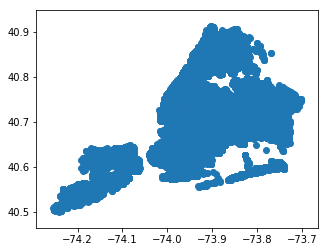

In [10]:
incidents_gdf.plot()

In [11]:
set(incidents['incident_type_desc'])

{'100 - Fire, other',
 '111 - Building fire',
 '112 - Fires in structure other than in a building',
 '114 - Chimney or flue fire, confined to chimney or flue',
 '115 - Incinerator overload or malfunction, fire confined',
 '116 - Fuel burner/boiler malfunction, fire confined',
 '117 - Commercial Compactor fire, confined to rubbish',
 '118 - Trash or rubbish fire, contained',
 '120 - Fire in mobile prop. used as a fixed struc., other',
 '121 - Fire in mobile home used as fixed residence',
 '122 - Fire in motor home, camper, recreational vehicle',
 '130 - Mobile property (vehicle) fire, other',
 '138 - Off-road vehicle or heavy equipment fire',
 '150 - Outside rubbish fire, other',
 '151 - Outside rubbish, trash or waste fire',
 '154 - Dumpster or other outside trash receptacle fire',
 '160 - Special outside fire, other',
 '161 - Outside storage fire',
 '162 - Outside equipment fire',
 '163 - Outside gas or vapor combustion explosion',
 '200 - Overpressure rupture, explosion, overheat oth

In [12]:
len(incidents_gdf[incidents_gdf['incident_type_num'] > 200])

432

In [14]:
## ALL EVENTS (too big :( )
# type_dict = {}

# for incident_type in set(incidents_gdf['incident_type_desc']):
#     type_dict[incident_type] = incidents_gdf[incidents_gdf['incident_type_desc']==incident_type].reset_index(drop = True)

In [15]:
# ## Still too big
# incidents_subset = incidents_gdf[incidents_gdf['incident_type_num'].isin([100,111,112,115,120,163])].reset_index(drop = True)

# type_dict = {}

# for incident_type in set(incidents_subset['incident_type_desc']):
#     type_dict[incident_type] = incidents_subset[incidents_subset['incident_type_desc']==incident_type].reset_index(drop = True)

In [16]:
## Just explosions & ruptures subset
explosions = incidents_gdf[incidents_gdf['incident_type_num'] > 200].reset_index(drop = True)
type_dict = {}

for incident_type in set(explosions['incident_type_desc']):
    type_dict[incident_type] = explosions[explosions['incident_type_desc']==incident_type].reset_index(drop = True)

In [17]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
cmap = get_cmap(len(type_dict))

color_dict = {}

for i,code in enumerate(type_dict):
    color = cmap(i)
    color_dict[code] = f"RGB({color[0]*256},{color[1]*256},{color[2]*256})"

In [18]:
color_dict

{'222 - Overpressure rupture of boiler from air or gas': 'RGB(256.0,0.0,0.0)',
 '221 - Overpressure rupture of air or gas pipe/pipeline': 'RGB(256.0,189.00018900018898,0.0)',
 '223 - Air or gas rupture of pressure or process vessel': 'RGB(133.99962199962198,256.0,0.0)',
 '231 - Chemical reaction rupture of process vessel': 'RGB(0.0,256.0,55.0003212982971)',
 '211 - Overpressure rupture of steam pipe or pipeline': 'RGB(0.0,256.0,243.99931960360615)',
 '220 - Overpressure rupture from air or gas, other': 'RGB(0.0,79.000567000567,256.0)',
 '213 - Steam rupture of pressure or process vessel': 'RGB(109.999621999622,0.0,256.0)',
 '210 - Overpressure rupture from steam, other': 'RGB(256.0,0.0,213.00018900018898)',
 '212 - Overpressure rupture of steam boiler': 'RGB(256.0,0.0,24.0)'}

In [19]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99212 entries, 0 to 99211
Data columns (total 29 columns):
action_taken1_desc              99212 non-null object
action_taken2_desc              47413 non-null object
action_taken3_desc              26314 non-null object
aes_presence_desc               14116 non-null object
arrival_date_time               97990 non-null object
borough_desc                    99212 non-null object
co_detector_present_desc        289 non-null object
detector_presence_desc          14116 non-null object
fire_box                        99209 non-null float64
fire_origin_below_grade_flag    2042 non-null float64
fire_spread_desc                14117 non-null object
floor                           37923 non-null object
highest_level_desc              99082 non-null object
im_incident_key                 99212 non-null int64
incident_date_time              99212 non-null object
incident_type_desc              99212 non-null object
last_unit_cleared_date_time  

In [20]:
## Cool, this looks roughly like the five boroughs of NYC
## Let's make a web map out of this

nyc_map = folium.Map(location = [40.71, -74.00],
                          zoom_start = 10,
                          tiles = 'Stamen Toner',
                          control_scale=True, 
                          prefer_canvas = True)

Fullscreen(
    title='Expand me',
    title_cancel='Exit fullscreen',
    force_separate_button=True
).add_to(nyc_map)

for event in type_dict:
    
    gdf = type_dict[event].fillna("")
    
    def pointcolors(counter):
        return(color_dict[event])
    
    gdf['color'] = gdf.apply(pointcolors,axis = 1)
    
    marker_cluster = MarkerCluster(control = False)
    marker_cluster.add_to(nyc_map)
    
    sub_group = FeatureGroupSubGroup(marker_cluster, name = event, control = True, show = False)
    
    for point in range(0, len(gdf)):
        html = """
                <h3>{title}</h3><br>
                <b>Incident Date-Time:</b> {incident_dt}<br>
                <b>Property Use:</b> {prop_use}<br>
                <b>Units Onscene:</b> {units}<br>
                <b>Street:</b> {street}<br>
                <b>Zipcode:</b> {zipcode}<br>
                <b>Borough:</b> {boro}<br>
                <b>Action Taken:</b> {action_taken}<br>
            """
        popup_contents = folium.Html(html.format(title = gdf['incident_type_desc'][point],
                                                     incident_dt = gdf['incident_date_time'][point],
                                                     prop_use = gdf['property_use_desc'][point],
                                                     units = gdf['units_onscene'][point],
                                                     street = gdf['street_highway'][point],
                                                     zipcode = gdf['zip_code'][point],
                                                     boro = gdf['borough'][point],
                                                     action_taken = gdf['action_taken1_desc'][point]),
                                         script = True)
        popup = folium.Popup(popup_contents, max_width=2650)

        folium.vector_layers.CircleMarker(radius = 10,
                                              location = (gdf.geometry[point].y,
                                                          gdf.geometry[point].x),
                                              popup = popup,
                                              color = gdf['color'][point],
                                              fill = True,
                                              fill_color = gdf['color'][point],
                                              name = event,
                                              control = True,
                                              overlay = True
                                             ).add_to(sub_group)
        
    sub_group.add_to(nyc_map)
folium.map.LayerControl(collapsed=False).add_to(nyc_map)
nyc_map.save('./fire_incident_folium_map.html')
nyc_map